In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
dir(FD_RES)

[1] "A001_K562_WSTARRseq"  "KS91_K562_ASTARRseq"  "log"                 
[4] "Readme.md"            "region"               "source"              
[7] "Tewhey_K562_TileMPRA" "tmp221007"

In [3]:
prefix = "KS91_K562_ASTARRseq"
fdiry = file.path(FD_RES, prefix, "coverage", "library_size")

fpath = file.path(fdiry, "library_size_summary.csv")
dat_astarr_lib = read_csv(fpath, show_col_types = FALSE)

fpath = file.path(fdiry, "region_total_counts.csv")
dat_astarr_cnt = read_csv(fpath, show_col_types = FALSE)

preix = "A001_K562_WSTARRseq"
fdiry = file.path(FD_RES, prefix, "coverage", "library_size")

fpath = file.path(fdiry, "library_size_summary.csv")
dat_wstarr_lib = read_csv(fpath, show_col_types = FALSE)

fpath = file.path(fdiry, "region_total_counts.csv")
dat_wstarr_cnt = read_csv(fpath, show_col_types = FALSE)


In [4]:
dat_lib = dat_astarr_lib %>% dplyr::mutate(Size = Count) %>% dplyr::select(Sample, Group, Size) 
dat_cnt = dat_astarr_cnt %>% dplyr::select(Sample, Group, Region, Count)

In [5]:
dat = left_join(dat_cnt, dat_lib, by=c("Sample", "Group"))
dat

Sample,Group,Region,Count,Size
<chr>,<chr>,<chr>,<dbl>,<dbl>
Input_rep1,Input,GATA1,358823,348695063
Input_rep2,Input,GATA1,461577,451369741
Input_rep3,Input,GATA1,496229,487579055
Input_rep4,Input,GATA1,464845,456246254
Input_rep5,Input,GATA1,454013,444268950
Input_rep6,Input,GATA1,409058,397333562
Output_rep1,Output,GATA1,505724,44103844
Output_rep2,Output,GATA1,686033,97471282
Output_rep3,Output,GATA1,441621,84103298


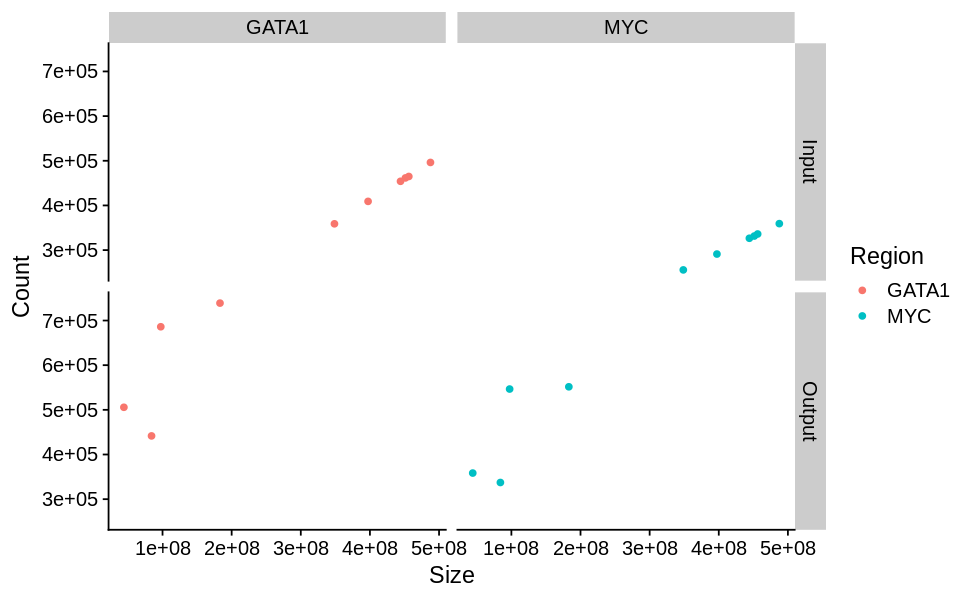

In [6]:
gpt = ggplot(dat, aes(x=Size, y=Count, color=Region)) + 
    geom_point() + 
    theme_cowplot() + 
    facet_grid(Group~Region)
options(repr.plot.width=8, repr.plot.height=5)
print(gpt)